# 1. Preparação do notebook

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

#2. Geração das séries temporais

## 2.1. Sem outliers

In [10]:
######################
##### Parâmetros #####
######################

n = 5943  # Número de passos (observações)
num_series = 10  # Número total de séries
np.random.seed(42)  # Para reprodutibilidade

############################
##### Séries Temporais #####
############################

# Gerar as séries com alta volatilidade
series_dict = {
    f"bm_high_vol_{i+1}": np.cumsum(np.random.normal(0, 3, n)) for i in range(num_series)
}

# Criar DataFrame
df = pd.DataFrame(series_dict)
df.head()

,bm_high_vol_1,bm_high_vol_2,bm_high_vol_3,bm_high_vol_4,bm_high_vol_5,bm_high_vol_6,bm_high_vol_7,bm_high_vol_8,bm_high_vol_9,bm_high_vol_10
0,1.490142,-4.633302,-0.361929,-0.481995,0.809471,-3.460511,-3.717486,3.534824,-8.035224,-1.489319
1,1.075350,-3.154650,-1.411585,-4.635129,1.732130,0.994956,-0.311256,2.557445,-5.016853,2.088240
2,3.018415,-0.653840,-1.954007,-5.258866,-0.543440,0.977577,0.708608,3.731143,-4.223082,1.082571
3,7.587505,-2.457220,-4.098000,-5.552543,2.631769,1.155100,-0.539993,1.682608,-4.752361,-0.634239
4,6.885045,1.040530,-5.177733,-9.249906,1.305092,-4.786794,-5.166021,2.640308,-9.752732,0.209665


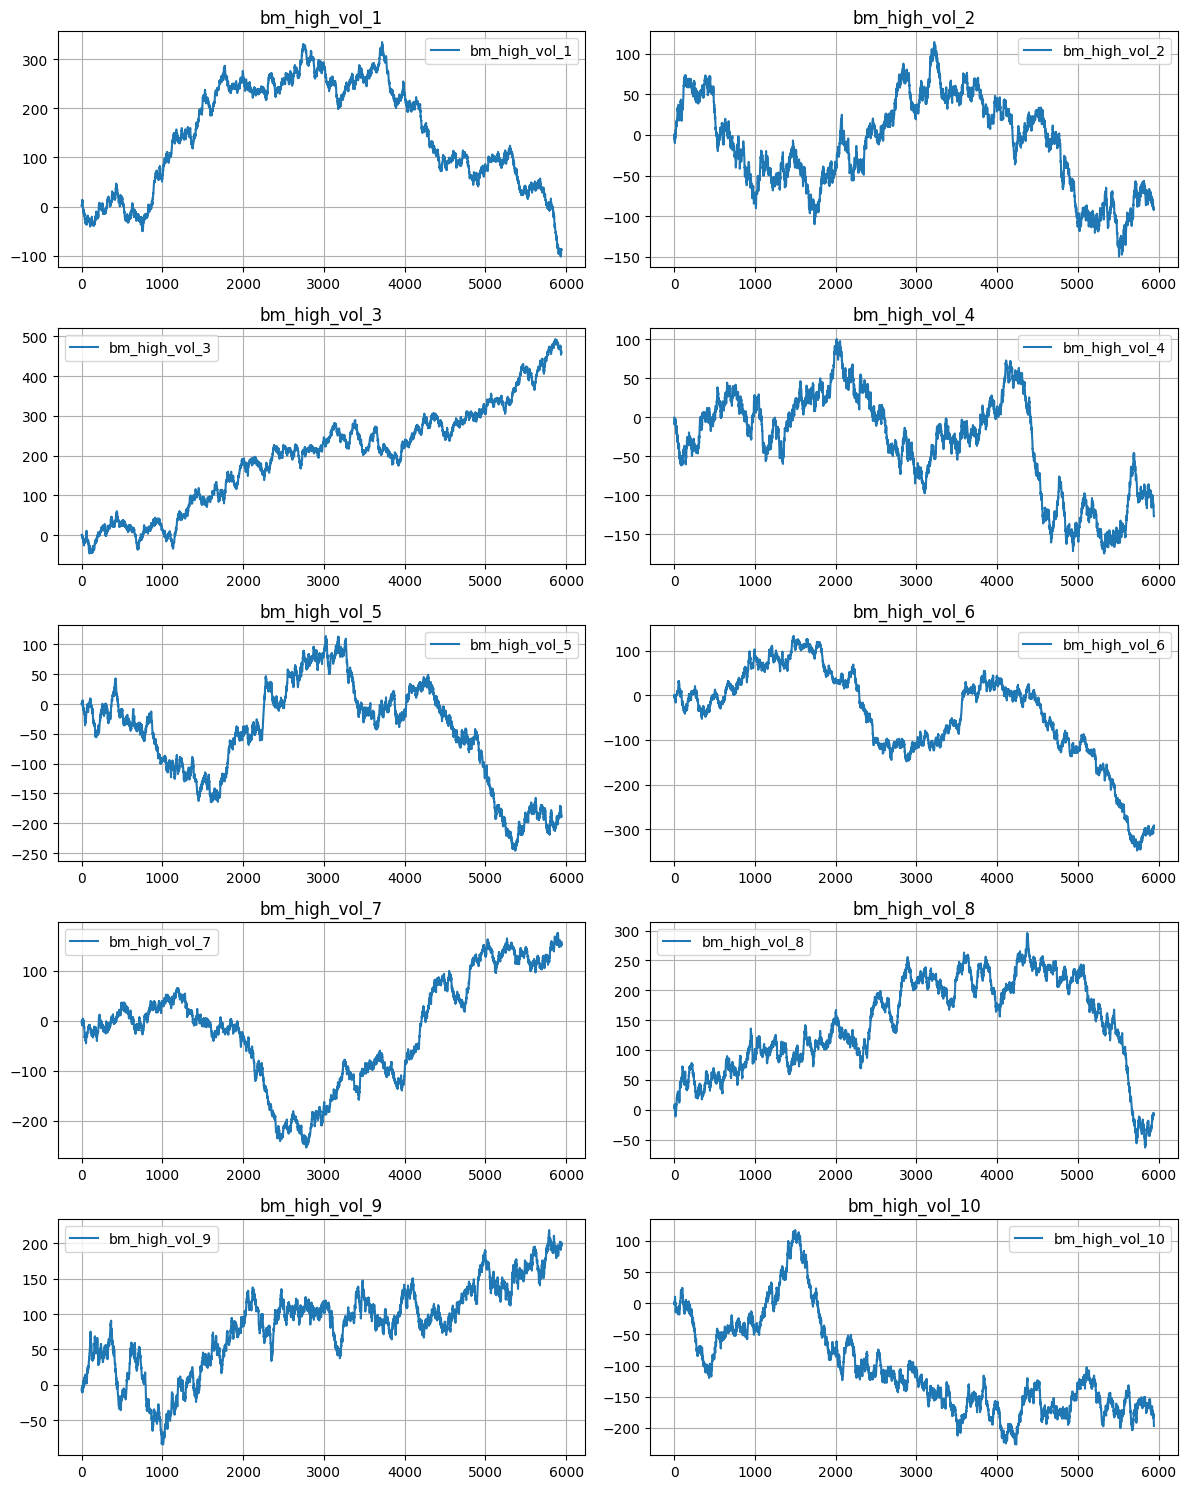

In [11]:
# Criar figura e subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

# Plotar cada série em um subplot
for i, col in enumerate(df.columns):
    axes[i].plot(df[col], label=col, linewidth=1.5)
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

In [12]:
################################
##### Detecção de outliers #####
################################

# Função para calcular o percentual de outliers usando o método IQR
def calcular_percentual_outliers(series):
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    outliers = (series < lim_inf) | (series > lim_sup)
    return np.mean(outliers) * 100

# Calcular o percentual de outliers para cada série
percentuais_outliers = {col: calcular_percentual_outliers(df[col]) for col in df.columns}

# Criar DataFrame com os resultados
df_detectOutliers = pd.DataFrame.from_dict(percentuais_outliers, orient='index', columns=['% Outliers']).round(2)
df_detectOutliers

,% Outliers
bm_high_vol_1,0.00
bm_high_vol_2,0.00
bm_high_vol_3,0.00
bm_high_vol_4,0.00
bm_high_vol_5,0.00
bm_high_vol_6,2.32
bm_high_vol_7,0.00
bm_high_vol_8,0.00
bm_high_vol_9,0.74
bm_high_vol_10,0.00


## 2.2. Com outliers

In [13]:
######################
##### Parâmetros #####
######################

n = 5943  # Número de passos (observações)
num_series = 10  # Número total de séries
np.random.seed(42)  # Para reprodutibilidade

############################
##### Séries Temporais #####
############################

# Gerar as séries com alta volatilidade
series_dict = {
    f"bm_high_vol_{i+1}": np.cumsum(np.random.normal(0, 3, n)) for i in range(num_series)
}

# Criar DataFrame
df = pd.DataFrame(series_dict)
df.head()

##############################
##### Adição de outliers #####
##############################

# Função para adicionar outliers em uma série
#def add_outliers(series, outlier_fraction=0.4):
#    n = len(series)
#    num_outliers = int(n * outlier_fraction)  # Total de outliers a serem inseridos

#    # Dividir os outliers igualmente entre os quartis
#    quartile_indices = np.array_split(np.random.permutation(n), 4)  # Divisão em quartis

    # Gerar valores de outliers (aumentando ou diminuindo em relação ao valor original)
#    for q_indices in quartile_indices:
#        num_q_outliers = len(q_indices) // 2  # Metade dos índices do quartil serão outliers
#        outlier_indices = np.random.choice(q_indices, num_q_outliers, replace=False)

        # Criar outliers aumentando ou diminuindo os valores em múltiplos do desvio padrão
#        std_dev = np.std(series)
#        series[outlier_indices] += np.random.choice([-1, 1], num_q_outliers) * np.random.uniform(3, 5) * std_dev

#    return series

def add_outliers(series, outlier_fraction=0.05):
    n = len(series)
    num_outliers = int(n * outlier_fraction)  # Definir a quantidade de outliers

    # Selecionar índices aleatórios para inserção dos outliers
    outlier_indices = np.random.choice(n, num_outliers, replace=False)

    # Gerar valores de outliers sem modificar drasticamente a estrutura
    std_dev = np.std(series)
    series[outlier_indices] += np.random.choice([-1, 1], num_outliers) * np.random.uniform(2, 4) * std_dev

    return series

# Aplicar a função de adição de outliers a cada série
df_outliers = df.apply(add_outliers, axis=0)
df_outliers.head()

,bm_high_vol_1,bm_high_vol_2,bm_high_vol_3,bm_high_vol_4,bm_high_vol_5,bm_high_vol_6,bm_high_vol_7,bm_high_vol_8,bm_high_vol_9,bm_high_vol_10
0,1.490142,-4.633302,-0.361929,-0.481995,0.809471,-3.460511,-3.717486,3.534824,-8.035224,-1.489319
1,1.075350,-3.154650,-1.411585,-4.635129,1.732130,-238.237528,-0.311256,2.557445,-5.016853,2.088240
2,3.018415,-0.653840,-1.954007,214.373377,-0.543440,0.977577,0.708608,160.412832,-4.223082,1.082571
3,7.587505,-2.457220,-4.098000,-5.552543,2.631769,1.155100,-0.539993,158.364296,-4.752361,-0.634239
4,6.885045,1.040530,-5.177733,-9.249906,1.305092,-4.786794,-5.166021,2.640308,-9.752732,0.209665


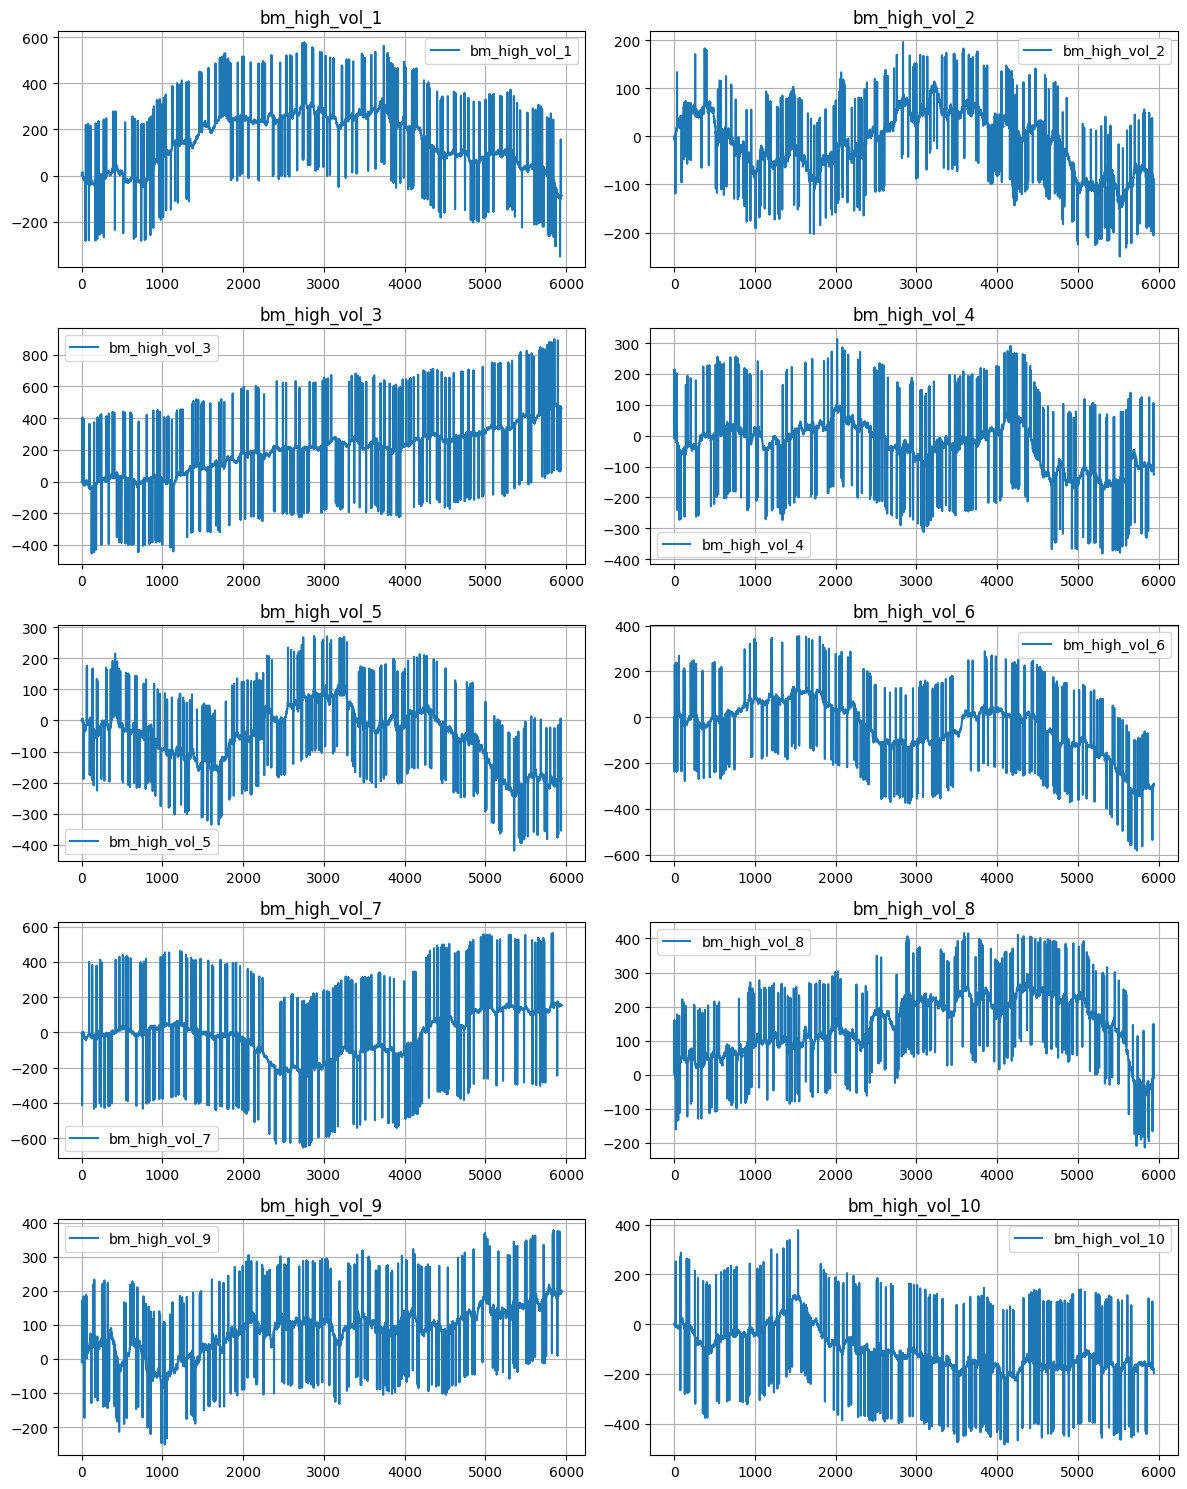

In [14]:
# Criar figura e subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

# Plotar cada série em um subplot
for i, col in enumerate(df.columns):
    axes[i].plot(df_outliers[col], label=col, linewidth=1.5)
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

In [15]:
################################
##### Detecção de outliers #####
################################

# Calcular o percentual de outliers para cada série
percentuais_outliers = {col: calcular_percentual_outliers(df_outliers[col]) for col in df_outliers.columns}

# Criar DataFrame com os resultados
df_detectOutliers = pd.DataFrame.from_dict(percentuais_outliers, orient='index', columns=['% Outliers']).round(2)
df_detectOutliers

,% Outliers
bm_high_vol_1,0.56
bm_high_vol_2,0.34
bm_high_vol_3,2.61
bm_high_vol_4,3.25
bm_high_vol_5,1.03
bm_high_vol_6,3.15
bm_high_vol_7,3.99
bm_high_vol_8,0.34
bm_high_vol_9,3.30
bm_high_vol_10,3.18


# 3. Exportação dos dados

In [16]:
# Envio do DataFrame para um arquivo Excel
file_path = '[BM High Vol] Geração de séries temporais.xlsx'
df.to_excel(file_path, index=False)
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>